In [1]:
# Impor library yang diperlukan
import tensorflow as tf  # Library utama untuk deep learning dan pengelolaan tensor
from tensorflow import keras  # API tingkat tinggi untuk membangun model
from tensorflow.keras import layers  # Modul untuk mendefinisikan lapisan seperti Dense dan Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Alat untuk augmentasi data
import numpy as np  # Library untuk operasi numerik dan manipulasi array
import matplotlib.pyplot as plt  # Library untuk visualisasi data seperti grafik dan gambar

In [2]:
# Memuat dataset MNSIT
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.mnist.load_data()
# Memuat dataset MNSIT: 60.000 data latih penuh dan 10.000 data uji

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
# Membagi data menjadi training dan validation
from sklearn.model_selection import train_test_split  # Fungsi untuk membagi dataset
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)
# Membagi 60.000 data menjadi 48.000 training dan 12.000 validation

In [4]:
# Preprocessing: Normalisasi dan penambahan dimensi
x_train = x_train / 255.0  # Normalisasi nilai piksel menjadi 0-1 untuk training
x_val = x_val / 255.0  # Normalisasi data validation
x_test = x_test / 255.0  # Normalisasi data uji
x_train = x_train[..., np.newaxis]  # Menambah dimensi kanal menjadi (48000, 28, 28, 1)
x_val = x_val[..., np.newaxis]  # Menambah dimensi kanal menjadi (12000, 28, 28, 1)
x_test = x_test[..., np.newaxis]  # Menambah dimensi kanal menjadi (10000, 28, 28, 1)

In [5]:
# Augmentasi data untuk meningkatkan variasi
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotasi gambar hingga 10 derajat untuk variasi sudut
    width_shift_range=0.1,  # Geser horizontal hingga 10% lebar gambar
    height_shift_range=0.1,  # Geser vertikal hingga 10% tinggi gambar
    zoom_range=0.1,  # Zoom in/out hingga 10% untuk variasi skala
    shear_range=0.1  # Transformasi shear untuk variasi bentuk
)
datagen.fit(x_train)  # Menyesuaikan augmentasi dengan data training

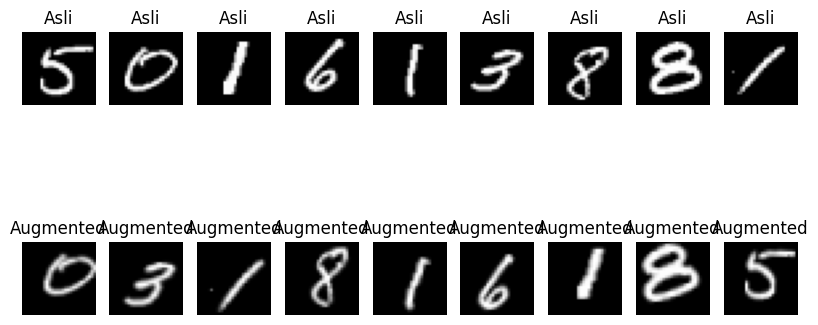

In [6]:
# Visualisasi data sebelum dan sesudah augmentasi
iterator = datagen.flow(x_train[:9], batch_size=9)  # Mengambil 9 gambar pertama untuk visualisasi
augmented_images = next(iterator)  # Mendapatkan batch gambar yang telah diaugmentasi
plt.figure(figsize=(10, 5))  # Membuat figure dengan ukuran 10x5 inci
for i in range(9):  # Loop untuk 9 gambar
    plt.subplot(2, 9, i+1)  # Baris pertama: gambar asli
    plt.imshow(x_train[i].squeeze(), cmap='gray')  # Menampilkan gambar asli dalam grayscale
    plt.title("Asli")  # Judul untuk gambar asli
    plt.axis('off')  # Menghilangkan sumbu
    plt.subplot(2, 9, i+10)  # Baris kedua: gambar augmentasi
    plt.imshow(augmented_images[i].squeeze(), cmap='gray')  # Menampilkan gambar augmentasi
    plt.title("Augmented")  # Judul untuk gambar augmentasi
    plt.axis('off')  # Menghilangkan sumbu
plt.show()  # Menampilkan visualisasi

In [7]:
# Membuat model CNN sederhana
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Lapisan konvolusi pertama
    layers.MaxPooling2D((2, 2)),  # Lapisan pooling untuk mengurangi dimensi
    layers.Conv2D(64, (3, 3), activation='relu'),  # Lapisan konvolusi kedua
    layers.MaxPooling2D((2, 2)),  # Lapisan pooling kedua
    layers.Flatten(),  # Meratakan output menjadi vektor
    layers.Dropout(0.5),  # Dropout untuk mencegah overfitting
    layers.Dense(128, activation='relu'),  # Lapisan fully connected
    layers.Dense(10, activation='softmax')  # Lapisan output untuk 10 kelas
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  # Optimizer, loss, dan metrik untuk pelatihan

In [9]:
# Melatih model dengan augmentasi data
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=10,  # Melatih selama 10 epoch
                    validation_data=(x_val, y_val))  # Data validation untuk monitoring

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.7771 - loss: 0.6872 - val_accuracy: 0.9814 - val_loss: 0.0645
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9502 - loss: 0.1592 - val_accuracy: 0.9843 - val_loss: 0.0500
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9642 - loss: 0.1154 - val_accuracy: 0.9893 - val_loss: 0.0345
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9706 - loss: 0.0953 - val_accuracy: 0.9900 - val_loss: 0.0359
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9757 - loss: 0.0826 - val_accuracy: 0.9898 - val_loss: 0.0347
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9763 - loss: 0.0761 - val_accuracy: 0.9909 - val_loss: 0.0282
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9780 - loss: 0.0697 - val_accuracy: 0.9923 - val_loss: 0.0257
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9790 - loss: 0.06

In [10]:
# Mengevaluasi model pada data uji
test_loss, test_acc = model.evaluate(x_test, y_test)
# Mengukur performa pada data uji
print(f'Akurasi uji: {test_acc:.4f}')  # Menampilkan akurasi uji

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9902 - loss: 0.0265
Akurasi uji: 0.9923


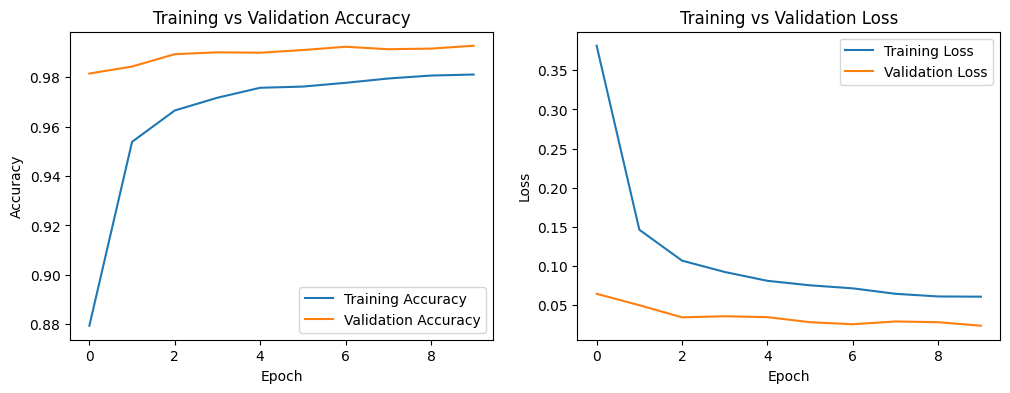

In [11]:
# Visualisasi akurasi training dan validation
plt.figure(figsize=(12, 4))  # Membuat figure dengan ukuran 12x4 inci
plt.subplot(1, 2, 1)  # Subplot pertama untuk akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Plot akurasi training
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Plot akurasi validation
plt.title('Training vs Validation Accuracy')  # Judul plot
plt.xlabel('Epoch')  # Label sumbu x
plt.ylabel('Accuracy')  # Label sumbu y
plt.legend()  # Menampilkan legenda
plt.subplot(1, 2, 2)  # Subplot kedua untuk loss
plt.plot(history.history['loss'], label='Training Loss')  # Plot loss training
plt.plot(history.history['val_loss'], label='Validation Loss')  # Plot loss validation
plt.title('Training vs Validation Loss')  # Judul plot
plt.xlabel('Epoch')  # Label sumbu x
plt.ylabel('Loss')  # Label sumbu y
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan kedua plot